## Problem Statement:
 
- Create a DataFrame by importing a new IRIS.csv file
 
- Split the IRIS dataset into 2 subsets: Training Dataset (70% rows) and Testing Dataset (30% rows)
 
- Implement the decision tree classifier algorithm on the IRIS Training dataset. 

### Firstly let's import the packages to be used

In [386]:
# import all packages to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Next we load the data

In [387]:
# load the data
dataset = pd.read_csv('Iris.csv', index_col=False)

### Next we understand the data we dealing with

In [388]:
dataset.shape

(150, 6)

- There are 150 observations in the dataset with 6 features.

In [389]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [390]:
# check for null values
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- We have a clean data with no null values.

In [391]:
# lets  drop id
dataset.drop(['Id'], axis=1, inplace=True)

In [392]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Exploratory Data Analysis

###  Univariate

In [393]:
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


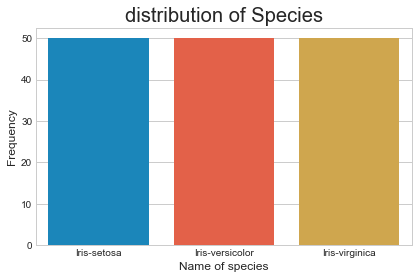

In [394]:
# bar plot
sb.countplot(dataset['Species'])
# Add labels
plt.style.use('fivethirtyeight')
plt.title('distribution of Species')
plt.xlabel('Name of species')
plt.ylabel('Frequency');

### Bivariate

### Let's check for correlations

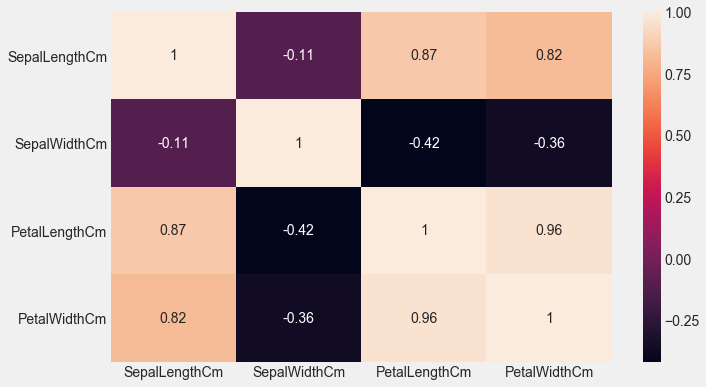

In [395]:
# plotting heatmap 
ax = plt.subplots(1,1, figsize=(10,6))
corr = dataset.corr()
sb.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

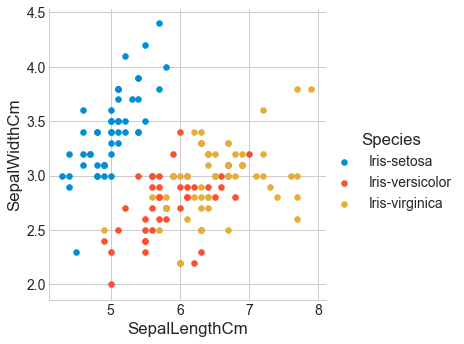

In [396]:
#scatter plot
sb.set_style('whitegrid');
sb.FacetGrid(dataset, hue='Species', size=5)\
.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
.add_legend();
plt.show();

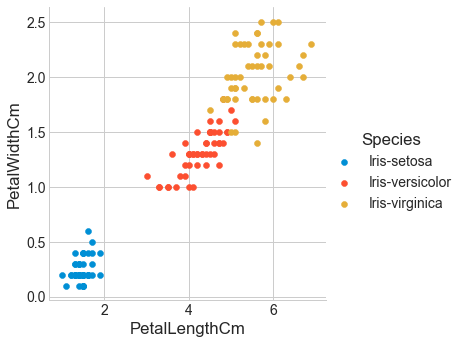

In [397]:
#scatter plot
sb.set_style('whitegrid');
sb.FacetGrid(dataset, hue='Species', size=5)\
.map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm')\
.add_legend();
plt.show();

In [398]:
array = dataset.values
x = array[:,0:4] #independent columns
y = array[:,4] #target column

### Handle categorical data

In [399]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
dataset['Species'] = lb.fit_transform(dataset['Species'])

#confirm changes
dataset.tail()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

In [400]:
dataset.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [401]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### Now we split the dataset into training set(70%) and test set(30%)

In [402]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)  # 70% training and 30% test

### Feature scaling

In [403]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xx = sc.fit_transform(X_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting Decision tree Classifier Algorithm and predicting the test set result

In [404]:
#Fitting Decision tree Classifier Algorithm
from sklearn import tree

classifier=tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=4, random_state=0) # Initialize and fit classifier

classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [405]:
#predicting the Test set results
ypred = classifier.predict(X_test)

In [406]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Model accuracy
print('Our model accuracy is:', round(metrics.accuracy_score(y_test,ypred),2))

Our model accuracy is: 0.98


In [407]:
#Model confusion matrix
confix = metrics.confusion_matrix(y_test,ypred)
confix

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

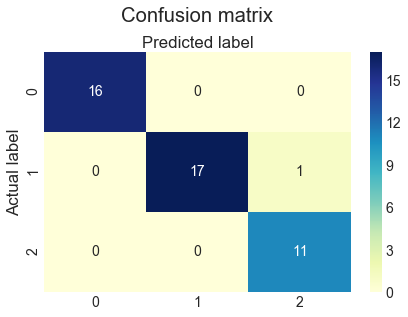

In [408]:
#Plot confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(confix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

### References

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python